We first set-up the inital code that will be consistent throughout our simulations for speed. That is the output for logging files, the parameter values and the same random seed

In [8]:
# Code to run simulations and plot runtime for populations of varying size
# but with constant number of population (10 individuals) initially infected.

import os
import logging
import matplotlib.pyplot as plt
import time
import numpy as np

import pyEpiabm as pe

# Setup output for logging file
logging.basicConfig(filename='sim.log', filemode='w+', level=logging.DEBUG,
                    format=('%(asctime)s - %(name)s'
                            + '- %(levelname)s - %(message)s'))

# Set config file for Parameters
pe.Parameters.set_file(os.path.join(os.path.abspath(''),
                       "simple_parameters.json"))


# Method to set the seed at the start of the simulation, for reproducibility

pe.routine.Simulation.set_random_seed(seed=42)

The first simulation we run changes the population size (1000, 2000, 4000, 8000, 10000) with the same initial infected number of individuals (10). This simulation only uses 1 cell.

In [9]:
pop_sizes = np.array([int(1000), int(2000), int(4000), int(8000),
                      int(10000), int(20000), int(40000), int(80000),
                      int(100000), int(200000)])
sim_times = []

number_sims = len(pop_sizes)

for i in range(len(pop_sizes)):

    # Pop_params are used to configure the population structure being used i
    # this simulation.
    pop_params = {"population_size": pop_sizes[i], "cell_number": 1,
                  "microcell_number": 1, "household_number": 5,
                  "place_number": 2}

    # Create a population based on the parameters given.
    population = pe.routine.ToyPopulationFactory().make_pop(pop_params)

    # sim_ and file_params give details for the running of the simulations and
    # where output should be written to.
    sim_params = {"simulation_start_time": 0, "simulation_end_time": 60,
                  "initial_infected_number": 10}

    file_params = {"output_file": "output.csv",
                   "output_dir": os.path.join(os.path.abspath('')),
                   "spatial_output": False, "age_stratified": False}

    # Store start time
    st = time.time()

    # Create a simulation object, configure it with the parameters given, then
    # run the simulation.
    sim = pe.routine.Simulation()
    sim.configure(
        population,
        [pe.sweep.InitialInfectedSweep()],
        [pe.sweep.HouseholdSweep(), pe.sweep.QueueSweep(),
         pe.sweep.HostProgressionSweep()],
        sim_params,
        file_params)
    sim.run_sweeps()

    # Store end time
    et = time.time()

    this_sim_time = et - st
    sim_times.append(this_sim_time)

    # Remove the output file
    if os.path.exists("output.csv"):
        os.remove("output.csv")

    # Need to close the writer object at the end of each simulation.
    del sim.writer
    del sim



  3%|▎         | 2/60 [00:27<13:29, 13.96s/it]


KeyboardInterrupt: 

We now plot this data on a linear scale and a log scale to try to accertain how the speed of simulation scales with population size.

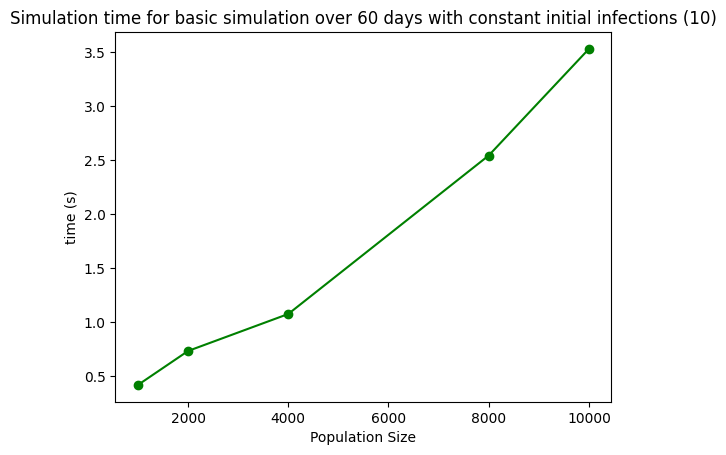

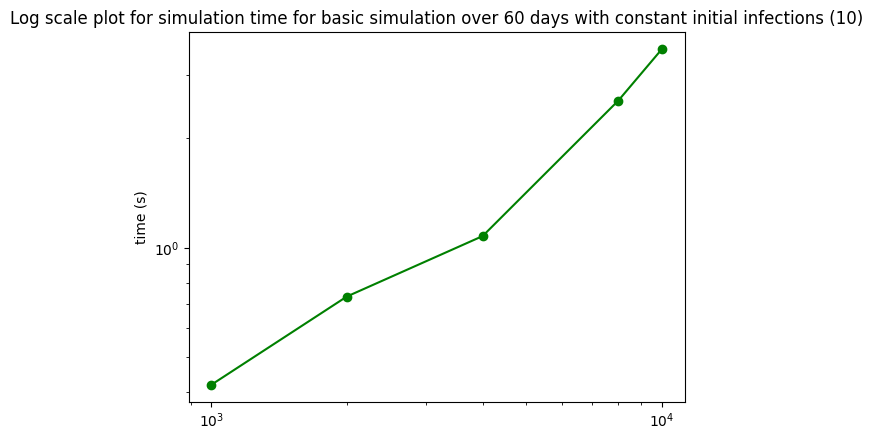

In [ ]:

# Plotting graph code
x = pop_sizes
y = sim_times

# Plot on linear scale
plt.title("Simulation time for basic simulation over 60 days with constant "
          "initial infections (10)")
plt.xlabel('Population Size')
plt.xscale('linear')
plt.ylabel('time (s)')
plt.plot(x, y, marker='o', c='g')

plt.show()

# Plot on log scale
plt.title("Log scale plot for simulation time for basic simulation over 60 days with constant "
          "initial infections (10)")
plt.xscale('log')
plt.yscale('log')
plt.ylabel('time (s)')
plt.plot(x, y, marker='o', c='g')

plt.show()


We now want to run a similar simulation by changing the population size but this time keeping the proportion of infected individuals the same (0.1%)

In [ ]:
pop_sizes = np.array([int(1000), int(2000), int(4000), int(8000),
                      int(10000), int(20000), int(40000), int(80000),
                      int(100000), int(200000)])
sim_times = []

number_sims = len(pop_sizes)

for i in range(len(pop_sizes)):

    # Pop_params are used to configure the population structure being used in
    # this simulation.
    pop_params = {"population_size": pop_sizes[i], "cell_number": 1,
                  "microcell_number": 1, "household_number": 5,
                  "place_number": 2}

    # Create a population based on the parameters given.
    population = pe.routine.ToyPopulationFactory().make_pop(pop_params)

    # sim_ and file_params give details for the running of the simulations and
    # where output should be written to.
    sim_params = {"simulation_start_time": 0, "simulation_end_time": 60,
                  "initial_infected_number": int(pop_sizes[i]/1000)}

    file_params = {"output_file": "output.csv",
                   "output_dir": os.path.join(os.path.abspath('')),
                   "spatial_output": False, "age_stratified": False}

    # Store start time
    st = time.time()

    # Create a simulation object, configure it with the parameters given, then
    # run the simulation.
    sim = pe.routine.Simulation()
    sim.configure(
        population,
        [pe.sweep.InitialInfectedSweep()],
        [pe.sweep.HouseholdSweep(), pe.sweep.QueueSweep(),
         pe.sweep.HostProgressionSweep()],
        sim_params,
        file_params)
    sim.run_sweeps()

    # Store end time
    et = time.time()

    this_sim_time = et - st
    sim_times.append(this_sim_time)

    # Remove the output file
    if os.path.exists("output.csv"):
        os.remove("output.csv")

    # Need to close the writer object at the end of each simulation.
    del sim.writer
    del sim



100%|██████████| 60/60 [00:03<00:00, 17.84it/s]


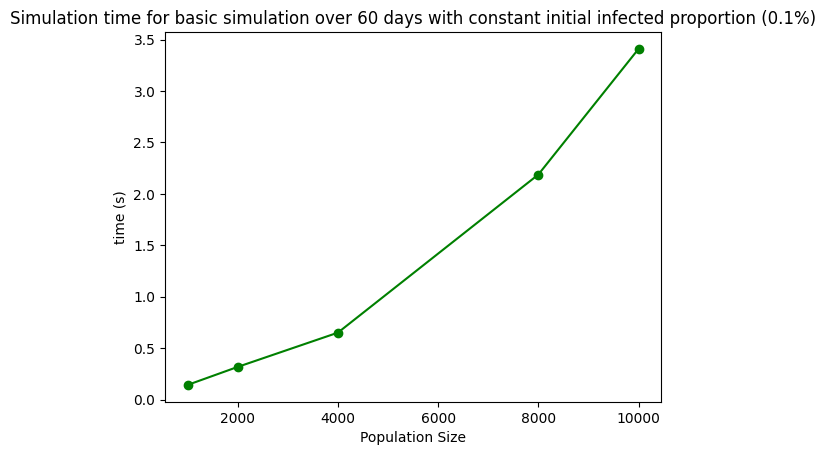

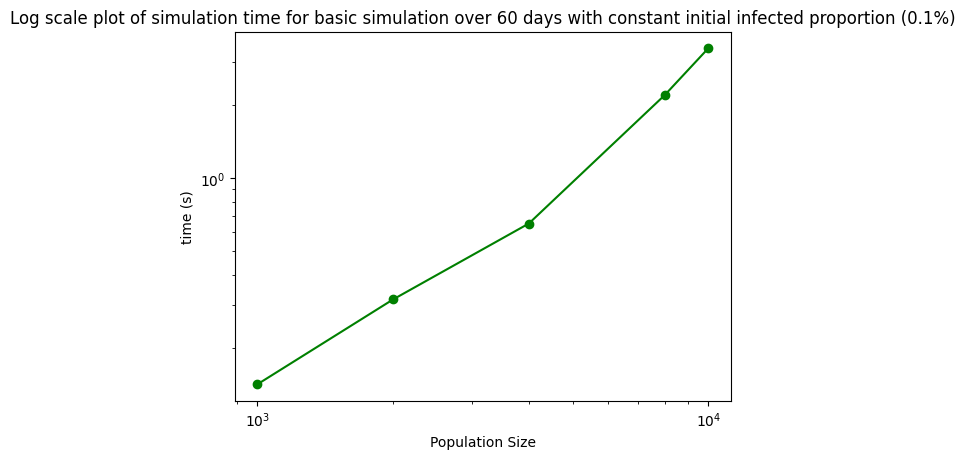

In [ ]:

# Plotting graph code
x = pop_sizes
y = sim_times

# Plot on linear scale
plt.title("Simulation time for basic simulation over 60 days with constant "
          "initial infected proportion (0.1%)")
plt.xlabel('Population Size')
plt.xscale('linear')
plt.yscale('linear')
plt.ylabel('time (s)')
plt.plot(x, y, marker='o', c='g')

plt.show()

# Plot on log scale
plt.title("Log scale plot of simulation time for basic simulation over 60 days with constant "
          "initial infected proportion (0.1%)")
plt.xlabel('Population Size')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('time (s)')
plt.plot(x, y, marker='o', c='g')

plt.show()

In [ ]:

pop_sizes = np.array([int(1000), int(2000), int(4000), int(8000), int(10000)])
sim_times = []

number_sims = len(pop_sizes)

for i in range(len(pop_sizes)):

    # Pop_params are used to configure the population structure being used in
    # this simulation.
    pop_params = {"population_size": pop_sizes[i], "cell_number": 1,
                  "microcell_number": 1, "household_number": 5,
                  "place_number": 2}

    # Create a population based on the parameters given.
    population = pe.routine.ToyPopulationFactory().make_pop(pop_params)

    # sim_ and file_params give details for the running of the simulations and
    # where output should be written to.
    sim_params = {"simulation_start_time": 0, "simulation_end_time": 60,
                  "initial_infected_number": int(pop_sizes[i]/1000)}

    file_params = {"output_file": "output.csv",
                   "output_dir": os.path.join(os.path.abspath('')),
                   "spatial_output": False, "age_stratified": False}

    # Store start time
    st = time.time()

    # Create a simulation object, configure it with the parameters given, then
    # run the simulation.
    sim = pe.routine.Simulation()
    sim.configure(
        population,
        [pe.sweep.InitialInfectedSweep()],
        [pe.sweep.HouseholdSweep(), pe.sweep.QueueSweep(),
         pe.sweep.HostProgressionSweep()],
        sim_params,
        file_params)
    sim.run_sweeps()

    # Store end time
    et = time.time()

    this_sim_time = et - st
    sim_times.append(this_sim_time)

    # Remove the output file
    if os.path.exists("output.csv"):
        os.remove("output.csv")

    # Need to close the writer object at the end of each simulation.
    del sim.writer
    del sim



100%|██████████| 60/60 [00:03<00:00, 17.11it/s]


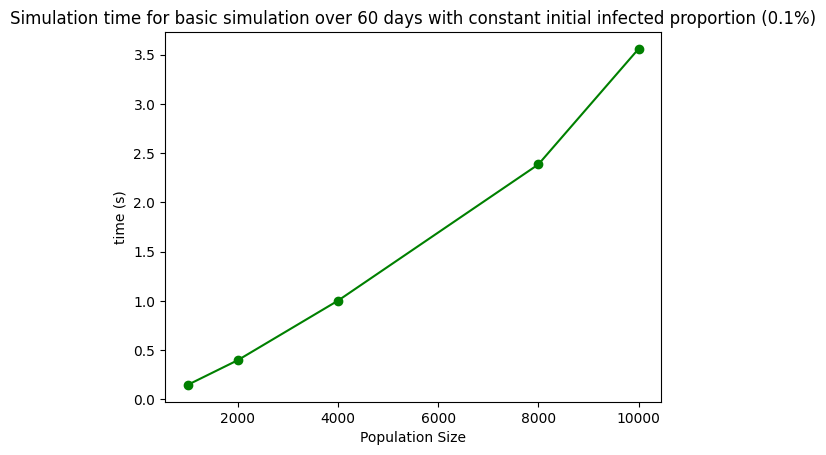

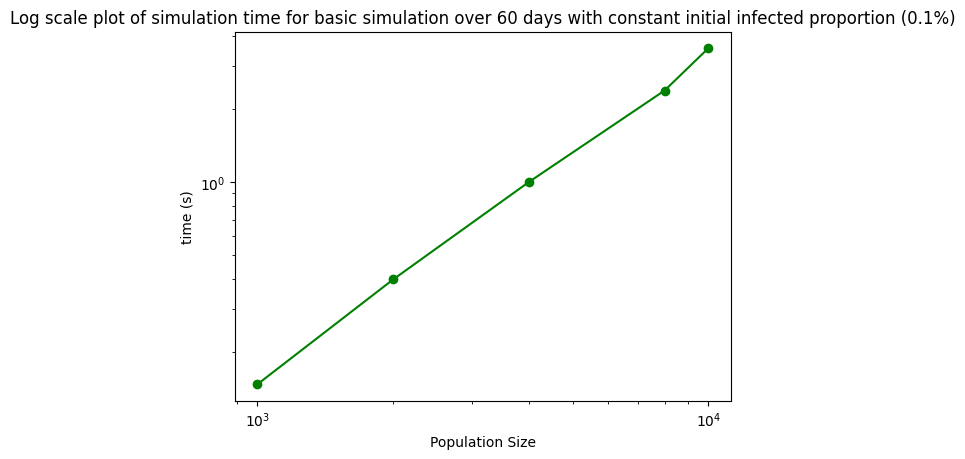

In [ ]:
# Plotting graph code
x = pop_sizes
y = sim_times

# Plot on linear scale
plt.title("Simulation time for basic simulation over 60 days with constant "
          "initial infected proportion (0.1%)")
plt.xlabel('Population Size')
plt.xscale('linear')
plt.yscale('linear')
plt.ylabel('time (s)')
plt.plot(x, y, marker='o', c='g')

plt.show()

# Plot on log scale
plt.title("Log scale plot of simulation time for basic simulation over 60 days with constant "
          "initial infected proportion (0.1%)")
plt.xlabel('Population Size')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('time (s)')
plt.plot(x, y, marker='o', c='g')

plt.show()